# Machine Learning - Assignment1

## Import Libraries

In [11]:
import pandas as pd
from sklearn import tree
import matplotlib.pyplot as plt

## Question 1

### Download Data

In [12]:
file_id = '1HAAdP4rtI2EkJS_867XHMajXxY6z0sRU' 
url = f'https://drive.google.com/uc?id={file_id}' 
 
df = pd.read_csv(url)
print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


### Train Regression Tree

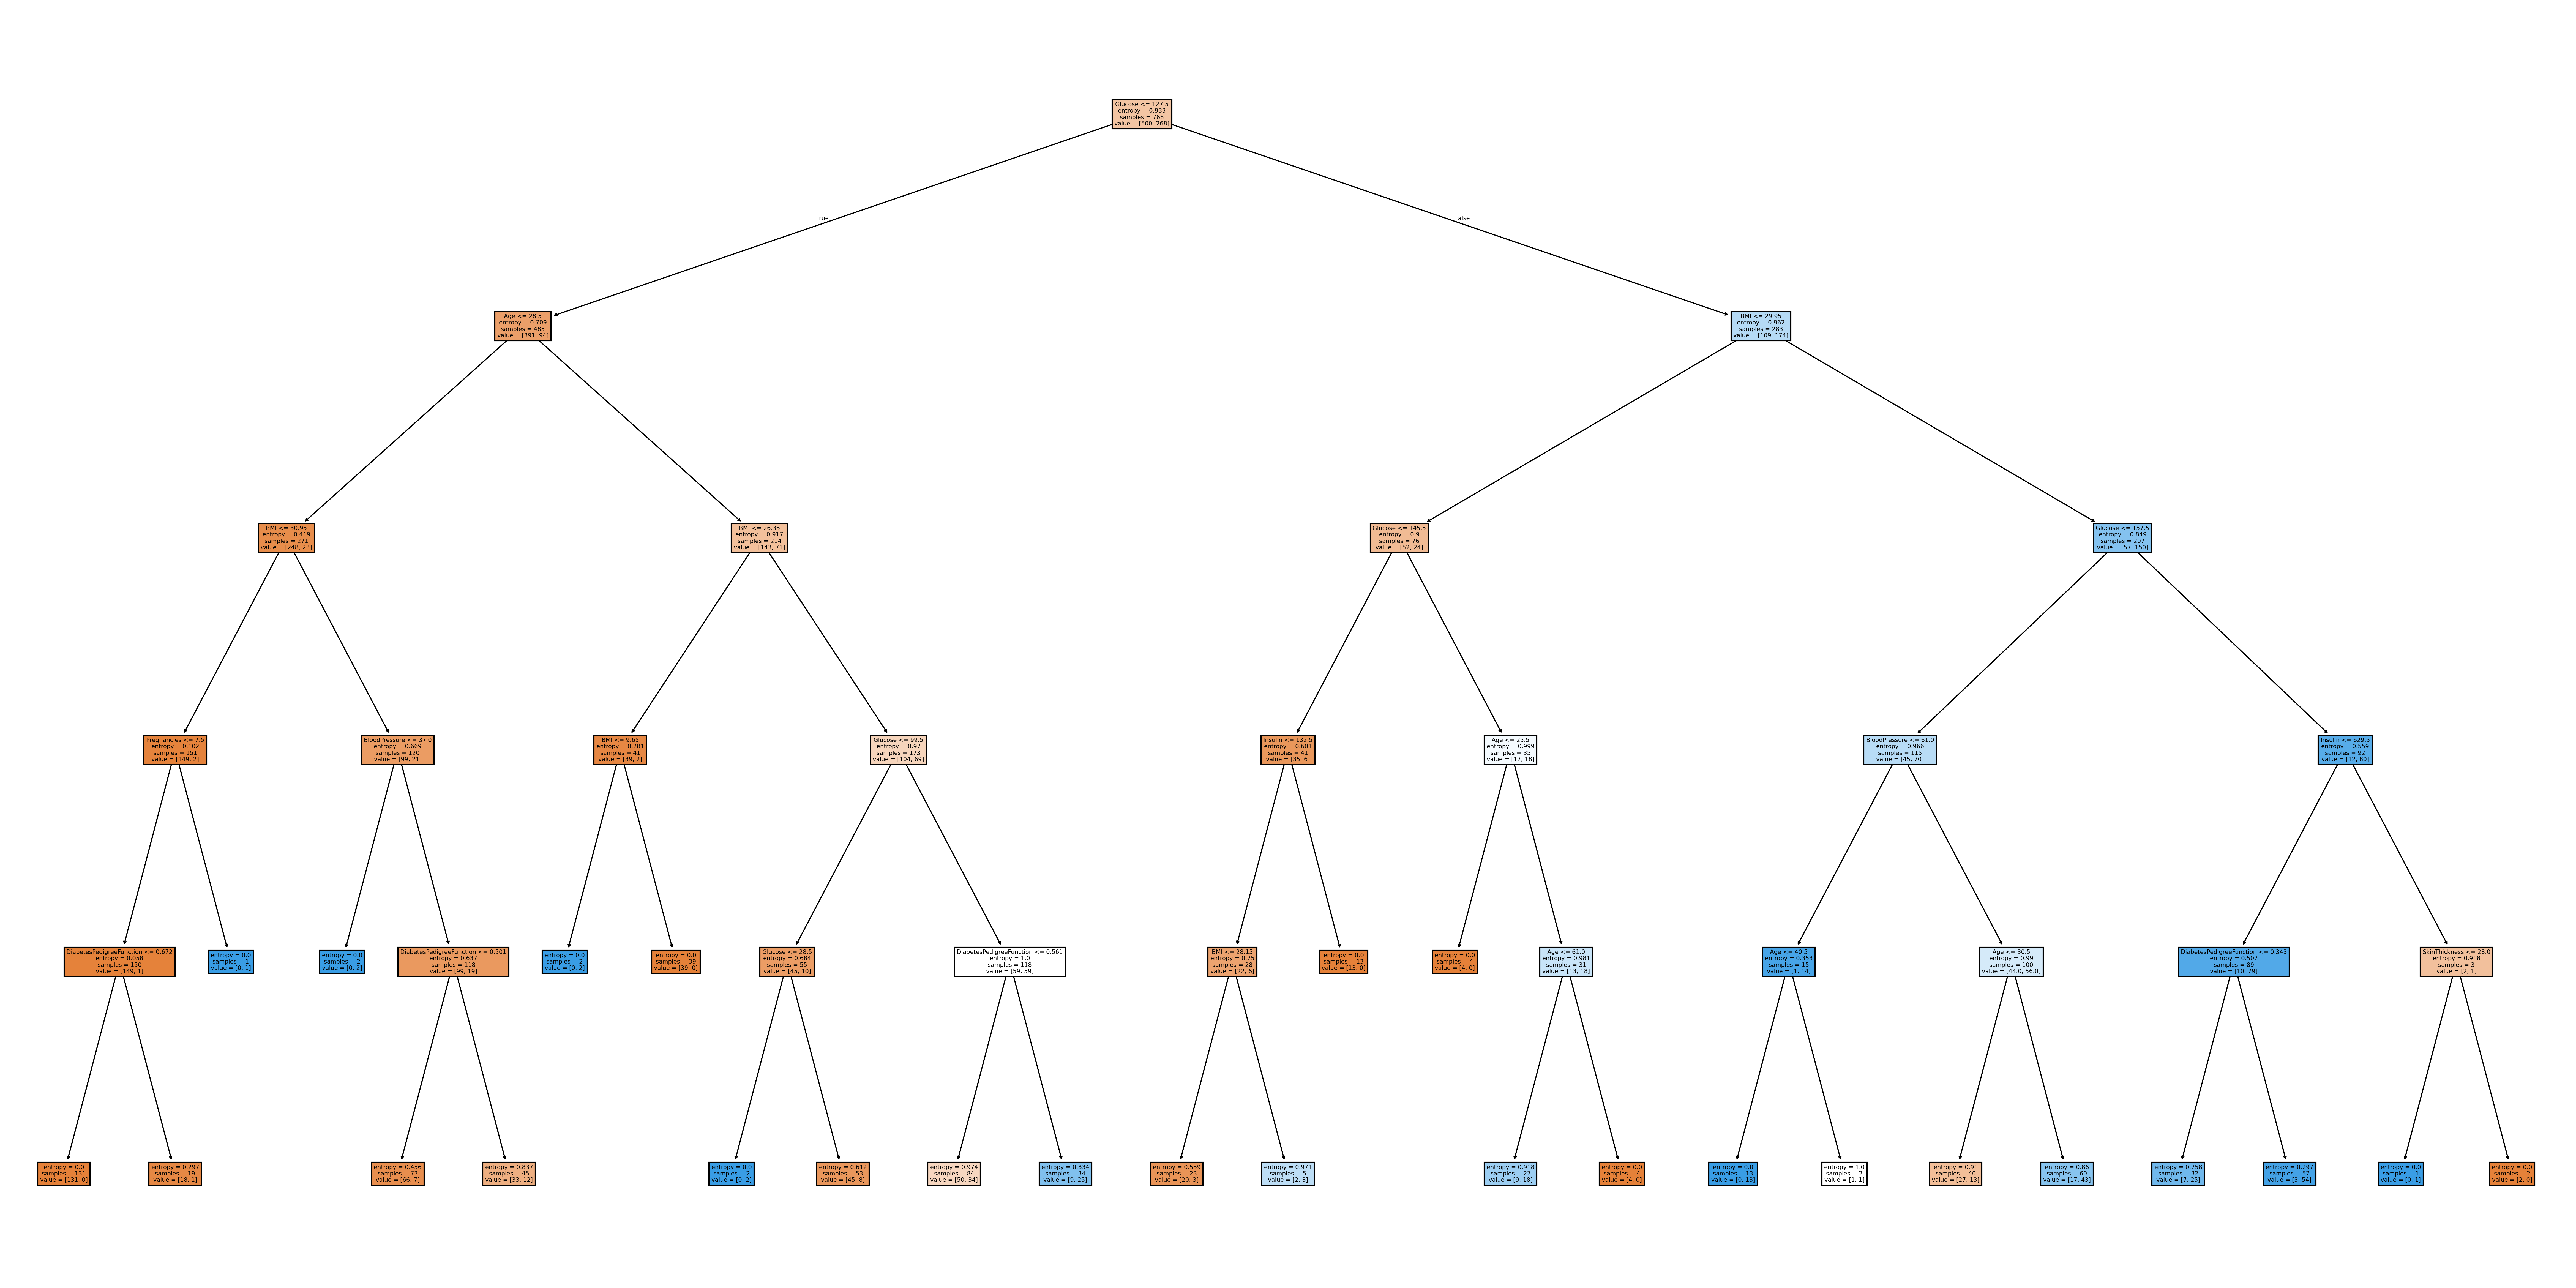

In [21]:
decision_tree = tree.DecisionTreeClassifier(max_depth=5, criterion='entropy')
features = [
    'Pregnancies', 
    'Glucose', 
    'BloodPressure', 
    'SkinThickness', 
    'Insulin', 
    'BMI', 
    'DiabetesPedigreeFunction', 
    'Age'
    ]
x = df[features]
y = df['Outcome']
decision_tree = decision_tree.fit(x, y)
plt.figure(figsize=(40, 20), dpi=300)
tree.plot_tree(decision_tree, feature_names=features, filled=True)
plt.show()